# Introduction/Business problem

 Busan, formerly romanized as Pusan and now officially Busan Metropolitan City, is South Korea's second-most populous city after Seoul, with a population of over 3.5 million inhabitants.[3] It is the economic, cultural and educational center of southeastern South Korea, with its port—Korea's busiest and the fifth-busiest in the world [a]—only about 190 kilometers (120 mi) from the Japanese islands of Kyushu and Honshu. The surrounding "Southeast Economic Zone" (including Ulsan and South Gyeongsang) is South Korea's largest industrial area.
 
However, Busan is a city unknown to foreigners yet. So, I wolud like to provide useful materials for tourists who want to travel to new cities in Korea or for business travelers.

<img src="busan.jpg">

## Description of the data

I used following data for this project.

<strong>Administrative divisions</strong>

<p>
    Datasource: <a src="https://en.wikipedia.org/wiki/Busan">https://en.wikipedia.org/wiki/Busan</a> <br>
Description: Administrative divisions Table with 16 subdivisions and population of each district
</p>


<strong>Map data of Busan:</strong>
<p>
Data source: <a src="http://www.gisdeveloper.co.kr/?p=2332">http://www.gisdeveloper.co.kr/?p=2332</a> <br>
Description : Shapefile of South Korea to extract the geojson of Busan 
</p>

<strong>Venues in each subdivision of Busan:</strong>
<p>
Data source: Foursquare APIs <br>
Description: All the venues in each subdivision
</p>


## Methodology

<strong>Scrap data from wikidipia</strong>

<p>
    First of all, I scraped data from Wikipedia to create a dataframe with the city districts of Busan. <br>
    <a src="https://en.wikipedia.org/wiki/Busan">https://en.wikipedia.org/wiki/Busan</a> <br>
    and, transformed the data into a dataframe containing name of the 16 subdivisions, Area and population.
</p>


In [79]:
busan_data

Subdivision    Area  Population
0         Buk-gu   39.36      303955
1    Busanjin-gu   29.70      372922
2        Dong-gu    9.73       90668
3     Dongnae-gu   16.63      271350
4     Gangseo-gu  181.50      123636
5   Geumjeong-gu   65.27      249054
6    Haeundae-gu   51.47      417174
7        Jung-gu    2.83       45821
8         Nam-gu   26.81      278681
9        Saha-gu   41.75      337423
10     Sasang-gu   36.09      233443
11        Seo-gu   13.93      111906
12    Suyeong-gu   10.21      181526
13    Yeongdo-gu   14.15      124918
14     Yeonje-gu   12.08      207396
15    Gijang-gun  218.32      164546

## Shapefile (SHP data of Busan

Nest step was to get the shapefile (SHP) of South Korea and extract the geojson of Busan by using QGIS 3 (<a src="https://www.qgis.org/">https://www.qgis.org/</a>)

Left image: Entire Soth Korea <br>
Right image: After filtering out

<div style="display: flex; justify-content: space-between; width: 100%; margin-top: 10px">
    <img src="gis_south_korea.png" style="max-width: 470px; height: auto; margin-top:unset ">
    <img src="gis_busan.png" style="max-width: 470px; height: auto; margin-top:unset"> 
</div>


## Geojson to goeDataFrame

Then, I used the geopands to transform geojson into geodataframe.
This geodataframe and the dataframre from wikidipia are merged into one geodataframe. <br>
The geodataframe contains geometry data for each subdivision.

In [81]:
busan_data

Subdivision Korean                                           geometry  \
0        Jung-gu     중구  MULTIPOLYGON (((129.03231 35.11643, 129.03235 ...   
1         Seo-gu     서구  MULTIPOLYGON (((129.01542 35.04808, 129.01515 ...   
2        Dong-gu     동구  MULTIPOLYGON (((129.04264 35.14589, 129.04327 ...   
3     Yeongdo-gu    영도구  MULTIPOLYGON (((129.09320 35.03771, 129.09324 ...   
4    Busanjin-gu   부산진구  MULTIPOLYGON (((129.04001 35.19981, 129.04033 ...   
5     Dongnae-gu    동래구  MULTIPOLYGON (((129.07905 35.22509, 129.07910 ...   
6         Nam-gu     남구  MULTIPOLYGON (((129.12702 35.09096, 129.12697 ...   
7         Buk-gu     북구  MULTIPOLYGON (((128.98774 35.20145, 128.98774 ...   
8    Haeundae-gu   해운대구  MULTIPOLYGON (((129.13898 35.15860, 129.13963 ...   
9        Saha-gu    사하구  MULTIPOLYGON (((128.95633 34.88970, 128.95609 ...   
10  Geumjeong-gu    금정구  MULTIPOLYGON (((129.10621 35.30646, 129.10640 ...   
11    Gangseo-gu    강서구  MULTIPOLYGON (((128.77648 35.01114, 128.77625 ...   
12     Yeonje-gu    연제구  MULTIPOLYGON (((129.07817 35.19945, 129.07827 ...   
13    Suyeong-gu    수영구  MULTIPOLYGON (((129.11682 35.18344, 129.11689 ...   
14     Sasang-gu    사상구  MULTIPOLYGON (((128.99094 35.19385, 128.99121 ...   
15    Gijang-gun    기장군  MULTIPOLYGON (((129.22953 35.21716, 129.22938 ...   

      Area  Population  
0     2.83       45821  
1    13.93      111906  
2     9.73       90668  
3    14.15      124918  
4    29.70      372922  
5    16.63      271350  
6    26.81      278681  
7    39.36      303955  
8    51.47      417174  
9    41.75      337423  
10   65.27      249054  
11  181.50      123636  
12   12.08      207396  
13   10.21      181526  
14   36.09      233443  
15  218.32      164546

## Map rendring

Using the folium package and the geodataframe, I then created a map of the 16 subdivisions with population.

In [10]:
busan_map = build_map(busan_data, 'default')
tooltip = build_tooltip(busan_map, busan_data, ['Subdivision', 'Population'], ['Subdivision: ','Population: '])

busan_map

C:\Users\JunyoungHwang\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Using Foursquare Location Data

At Last, I used each subdivision name for foursquare API to get all of venues in Busan and 464 venues were returned<br>
The quary string is: <br>
  <strong> e.g) near="수영구, 부산광역시, 대한민국" <strong>

In [85]:
busan_venues = getNearbyVenues(subdivision=busan_data['Subdivision'], 
                               korean=busan_data['Korean'])
print(busan_venues.shape)
busan_venues.head()

(463, 5)


Subdivision                 Venue  Venue Latitude  Venue Longitude  \
0     Jung-gu                 이재모피자       35.102056       129.030717   
1     Jung-gu                  화국반점       35.102683       129.034004   
2     Jung-gu  Golmok Gejang (골목게장)       35.108443       129.038069   
3     Jung-gu      Starbucks (스타벅스)       35.105049       129.036298   
4     Jung-gu    Busan Tower (부산타워)       35.100929       129.032514   

       Venue Category  
0         Pizza Place  
1  Chinese Restaurant  
2   Korean Restaurant  
3         Coffee Shop  
4      Scenic Lookout

## The higest number of venues in Busan

I plotted a bar chart with the top 10 highest number of venues in the whole city. We can see that Coffee shop, Korean Restaurant and Fast Food Restaurant are the top 3 within 84 unique venues in Busan.

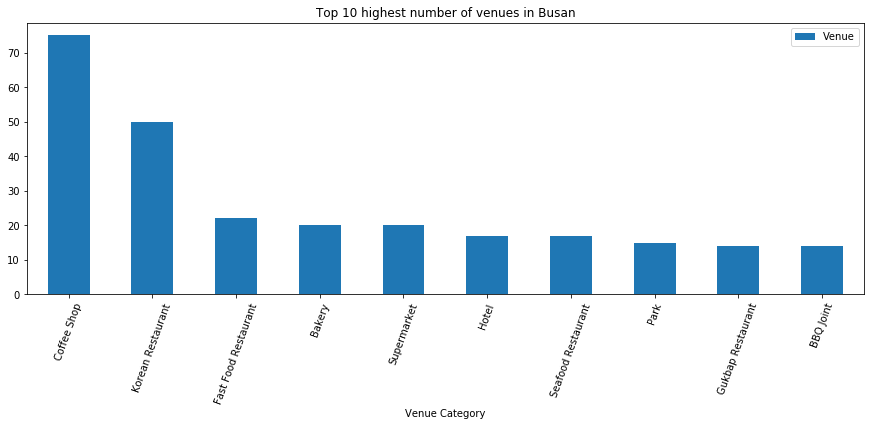

In [86]:
venues = busan_venues.groupby('Venue Category').count().sort_values(by='Venue', ascending=False).head(10)
venues.plot.bar(y="Venue", use_index=True, rot=70, title="Top 10 highest number of venues in Busan", figsize=(15,5));

In [87]:
print('There are {} uniques categories.'.format(len(busan_venues['Venue Category'].unique())))

There are 84 uniques categories.


To find clusters of city districts, I create a data-frame with pandas one hot encoding for the venue categories.

In [90]:
print(busan_onehot.shape)
busan_onehot.head()

(463, 85)


Subdivision  Airport  Airport Lounge  Art Gallery  Asian Restaurant  \
0     Jung-gu        0               0            0                 0   
1     Jung-gu        0               0            0                 0   
2     Jung-gu        0               0            0                 0   
3     Jung-gu        0               0            0                 0   
4     Jung-gu        0               0            0                 0   

   BBQ Joint  Bakery  Bar  Baseball Field  Beach  ...  Spa  Steakhouse  \
0          0       0    0               0      0  ...    0           0   
1          0       0    0               0      0  ...    0           0   
2          0       0    0               0      0  ...    0           0   
3          0       0    0               0      0  ...    0           0   
4          0       0    0               0      0  ...    0           0   

   Supermarket  Sushi Restaurant  Theme Park  Toll Plaza  Trail  \
0            0                 0           0           0      0   
1            0                 0           0           0      0   
2            0                 0           0           0      0   
3            0                 0           0           0      0   
4            0                 0           0           0      0   

   Train Station  Turkish Restaurant  Used Bookstore  
0              0                   0               0  
1              0                   0               0  
2              0                   0               0  
3              0                   0               0  
4              0                   0               0  

[5 rows x 85 columns]

I used this information to create a data frame in which you can see the most common restaurant venue types for each city district.

In [95]:
subdivision_venues_sorted

Subdivision 1st Most Common Venue 2nd Most Common Venue  \
0         Buk-gu                Bakery           Coffee Shop   
1    Busanjin-gu           Coffee Shop     Korean Restaurant   
2        Dong-gu     Korean Restaurant     Gukbap Restaurant   
3     Dongnae-gu           Coffee Shop     Korean Restaurant   
4     Gangseo-gu           Supermarket  Fast Food Restaurant   
5   Geumjeong-gu           Coffee Shop                  Café   
6     Gijang-gun           Coffee Shop    Seafood Restaurant   
7    Haeundae-gu             BBQ Joint     Korean Restaurant   
8        Jung-gu           Coffee Shop     Korean Restaurant   
9         Nam-gu        Ice Cream Shop  Fast Food Restaurant   
10       Saha-gu           Coffee Shop                Bakery   
11     Sasang-gu           Supermarket     Korean Restaurant   
12        Seo-gu           Coffee Shop     Korean Restaurant   
13    Suyeong-gu           Coffee Shop    Seafood Restaurant   
14    Yeongdo-gu     Korean Restaurant                 Beach   
15     Yeonje-gu           Coffee Shop  Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Fast Food Restaurant     Korean Restaurant        Ice Cream Shop   
1     Italian Restaurant          Noodle House             BBQ Joint   
2                  Hotel                  Café           Coffee Shop   
3            Supermarket                 Hotel                Market   
4      Korean Restaurant           Coffee Shop        Airport Lounge   
5      Korean Restaurant           Bus Station           Supermarket   
6            Golf Course     Korean Restaurant                  Park   
7                  Hotel           Coffee Shop                   Bar   
8                  Hotel                Market                  Park   
9      Gukbap Restaurant     Korean Restaurant                Bakery   
10  Fast Food Restaurant        Ice Cream Shop            Food Court   
11           Coffee Shop  Fast Food Restaurant        Airport Lounge   
12             BBQ Joint                Market        Used Bookstore   
13     Korean Restaurant             BBQ Joint                   Bar   
14        Scenic Lookout                 Trail                  Café   
15           Supermarket          Intersection                Bakery   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Park             Multiplex                Market   
1                  Hotel                  Park          Concert Hall   
2     Chinese Restaurant        Scenic Lookout                  Park   
3       Department Store   Fried Chicken Joint         Big Box Store   
4         Ice Cream Shop               Airport            Racecourse   
5   Fast Food Restaurant    Turkish Restaurant      Department Store   
6                  Beach              Cemetery                Market   
7     Seafood Restaurant                Hostel                Buffet   
8         Used Bookstore            Public Art   Japanese Restaurant   
9            Coffee Shop    Seafood Restaurant          Concert Hall   
10                 Beach                  Café          Outlet Store   
11               Airport                  Park                 Hotel   
12          Noodle House    Chinese Restaurant   Fried Chicken Joint   
13               Brewery                  Park             Multiplex   
14    Chinese Restaurant           Coffee Shop                  Pier   
15        Baseball Field         Metro Station            Donut Shop   

    9th Most Common Venue 10th Most Common Venue  
0     Dumpling Restaurant                  Hotel  
1               Multiplex       Department Store  
2                   Trail                 Bakery  
3            Noodle House    Dumpling Restaurant  
4                   Hotel         Duty-free Shop  
5                Bus Line    Moroccan Restaurant  
6     Monument / Landmark            Outlet Mall  
7     Dumpling Restaurant    Japanese Restaurant  
8      

I used prescriptive analytics to help a traveler decide a location to visit. I will use clustering (KMeans). <br>
Data is normalized with StandardScaler and Silhouette Method helps find out the opitmal K. <br>
<strong>The optimal K is 4</strong>

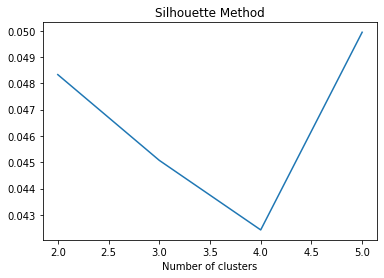

In [98]:
busan_grouped_clustering = busan_grouped.drop('Subdivision', 1)
Clus_dataSet = StandardScaler().fit_transform(busan_grouped_clustering)

distortion = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(Clus_dataSet)  
    predict = kmeans.fit_predict(Clus_dataSet)
    distortion.append(silhouette_score(Clus_dataSet, predict, metric = 'euclidean'))

plt.plot(range(2, 6), distortion)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.show()

## Result and Conclusion

Here is the result of K-mean clustring with the K value. <br>
What we see in the table are the city districts and their most common venues, and they now have been assigned 4 different cluster labels. <br>
As a result, the Coffee Shop and Korean Restaurant can be found all over Busan.

In [100]:
busan_merged.head()

Subdivision Korean                                           geometry  \
0      Jung-gu     중구  MULTIPOLYGON (((129.03231 35.11643, 129.03235 ...   
1       Seo-gu     서구  MULTIPOLYGON (((129.01542 35.04808, 129.01515 ...   
2      Dong-gu     동구  MULTIPOLYGON (((129.04264 35.14589, 129.04327 ...   
3   Yeongdo-gu    영도구  MULTIPOLYGON (((129.09320 35.03771, 129.09324 ...   
4  Busanjin-gu   부산진구  MULTIPOLYGON (((129.04001 35.19981, 129.04033 ...   

    Area  Population  Cluster Labels 1st Most Common Venue  \
0   2.83       45821               0           Coffee Shop   
1  13.93      111906               0           Coffee Shop   
2   9.73       90668               0     Korean Restaurant   
3  14.15      124918               0     Korean Restaurant   
4  29.70      372922               0           Coffee Shop   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Korean Restaurant                 Hotel                Market   
1     Korean Restaurant             BBQ Joint                Market   
2     Gukbap Restaurant                 Hotel                  Café   
3                 Beach        Scenic Lookout                 Trail   
4     Korean Restaurant    Italian Restaurant          Noodle House   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Park        Used Bookstore            Public Art   
1        Used Bookstore          Noodle House    Chinese Restaurant   
2           Coffee Shop    Chinese Restaurant        Scenic Lookout   
3                  Café    Chinese Restaurant           Coffee Shop   
4             BBQ Joint                 Hotel                  Park   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Japanese Restaurant      Department Store              Multiplex  
1   Fried Chicken Joint           Pizza Place                  Plaza  
2                  Park                 Trail                 Bakery  
3                  Pier         Deli / Bodega                   Port  
4          Concert Hall             Multiplex       Department Store

<strong> Cluster 0 - Hotels and Markets are the common venues in this districts (except Coffee Shop and Korean Restaurant) </strong>

In [73]:
busan_merged.loc[busan_merged['Cluster Labels'] == 0, busan_merged.columns[[0] + list(range(5, busan_merged.shape[1]))]]

Subdivision  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0      Jung-gu               0           Coffee Shop     Korean Restaurant   
1       Seo-gu               0           Coffee Shop     Korean Restaurant   
2      Dong-gu               0     Korean Restaurant     Gukbap Restaurant   
4  Busanjin-gu               0           Coffee Shop     Korean Restaurant   
5   Dongnae-gu               0           Coffee Shop     Korean Restaurant   
8  Haeundae-gu               0             BBQ Joint     Korean Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Hotel                Market                  Park   
1             BBQ Joint                Market        Used Bookstore   
2                 Hotel                  Café           Coffee Shop   
4    Italian Restaurant          Noodle House             BBQ Joint   
5           Supermarket                 Hotel                Market   
8                 Hotel           Coffee Shop                   Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Used Bookstore            Public Art   Japanese Restaurant   
1          Noodle House    Chinese Restaurant   Fried Chicken Joint   
2    Chinese Restaurant        Scenic Lookout                  Park   
4                 Hotel                  Park          Concert Hall   
5      Department Store   Fried Chicken Joint         Big Box Store   
8    Seafood Restaurant                Hostel                Buffet   

  9th Most Common Venue 10th Most Common Venue  
0      Department Store              Multiplex  
1           Pizza Place                  Plaza  
2                 Trail                 Bakery  
4             Multiplex       Department Store  
5          Noodle House    Dumpling Restaurant  
8   Dumpling Restaurant    Japanese Restaurant

<strong> Cluster 1 - Supermarket and Fast Food Restaurant are the common venues in this districts (except Coffee Shop and Korean Restaurant) </strong>

In [74]:
busan_merged.loc[busan_merged['Cluster Labels'] == 1, busan_merged.columns[[0] + list(range(5, busan_merged.shape[1]))]]

Subdivision  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6         Nam-gu               1        Ice Cream Shop  Fast Food Restaurant   
7         Buk-gu               1                Bakery           Coffee Shop   
9        Saha-gu               1           Coffee Shop                Bakery   
10  Geumjeong-gu               1           Coffee Shop                  Café   
11    Gangseo-gu               1           Supermarket  Fast Food Restaurant   
12     Yeonje-gu               1           Coffee Shop  Fast Food Restaurant   
13    Suyeong-gu               1           Coffee Shop    Seafood Restaurant   
14     Sasang-gu               1           Supermarket     Korean Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6      Gukbap Restaurant     Korean Restaurant                Bakery   
7   Fast Food Restaurant     Korean Restaurant        Ice Cream Shop   
9   Fast Food Restaurant            Donut Shop        Ice Cream Shop   
10     Korean Restaurant           Bus Station           Supermarket   
11     Korean Restaurant           Coffee Shop        Airport Lounge   
12           Supermarket          Intersection                Bakery   
13     Korean Restaurant             BBQ Joint                   Bar   
14           Coffee Shop  Fast Food Restaurant        Airport Lounge   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6            Coffee Shop    Seafood Restaurant          Concert Hall   
7                   Park             Multiplex                Market   
9             Food Court                 Beach                  Café   
10  Fast Food Restaurant    Turkish Restaurant      Department Store   
11        Ice Cream Shop               Airport            Racecourse   
12        Baseball Field         Metro Station            Donut Shop   
13               Brewery                  Park             Multiplex   
14               Airport                  Park                 Hotel   

    9th Most Common Venue 10th Most Common Venue  
6     Japanese Restaurant       Ramen Restaurant  
7     Dumpling Restaurant                  Hotel  
9            Outlet Store          Metro Station  
10               Bus Line    Moroccan Restaurant  
11                  Hotel         Duty-free Shop  
12      Outdoor Sculpture              Multiplex  
13  Performing Arts Venue    Japanese Restaurant  
14         Ice Cream Shop         Duty-free Shop

<strong> Cluster 2 - Beach and Scenic Lookout are the common venues in this districts (except Coffee Shop and Korean Restaurant) </strong>

In [75]:
busan_merged.loc[busan_merged['Cluster Labels'] == 2, busan_merged.columns[[0] + list(range(5, busan_merged.shape[1]))]]

Subdivision  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3  Yeongdo-gu               2     Korean Restaurant                 Beach   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3        Scenic Lookout                 Trail                  Café   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3    Chinese Restaurant           Coffee Shop                  Pier   

  9th Most Common Venue 10th Most Common Venue  
3         Deli / Bodega                   Port

<strong> Cluster 3 - Seafood Restaurant and Golf Course are the common venues in this districts (except Coffee Shop and Korean Restaurant) </strong>

In [76]:
busan_merged.loc[busan_merged['Cluster Labels'] == 3, busan_merged.columns[[0] + list(range(5, busan_merged.shape[1]))]]

Subdivision  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
15  Gijang-gun               3           Coffee Shop    Seafood Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
15           Golf Course     Korean Restaurant                  Park   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
15                 Beach              Cemetery                Market   

   9th Most Common Venue 10th Most Common Venue  
15   Monument / Landmark            Outlet Mall

This map shows the city districts with a cluster-specific color and markers of each venues.

In [102]:
busan_map